<a href="https://colab.research.google.com/github/JOteng15/OGTIP-Project-4/blob/main/OGTIP_PROJECT__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


 #machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = pd.read_csv("train_v2.csv")

<ipython-input-21-ece021ed119a>:1: DtypeWarning: Columns (135,204,274) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train_v2.csv")


In [ ]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5.0,2.14,-1.54,1.18,0.1833,0.7873,1.0,0.0,5.0,0.0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6.0,0.54,-0.24,0.13,0.1926,-0.6787,1.0,0.0,5.0,0.0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13.0,2.89,-1.73,1.04,0.2521,0.7258,1.0,0.0,5.0,0.0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4.0,1.29,-0.89,0.66,0.2498,0.7119,1.0,0.0,5.0,0.0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26.0,6.11,-3.82,2.51,0.2282,-0.5399,0.0,0.0,5.0,0.0


In [ ]:
data.shape

(77526, 771)

<Axes: xlabel='loss', ylabel='Count'>

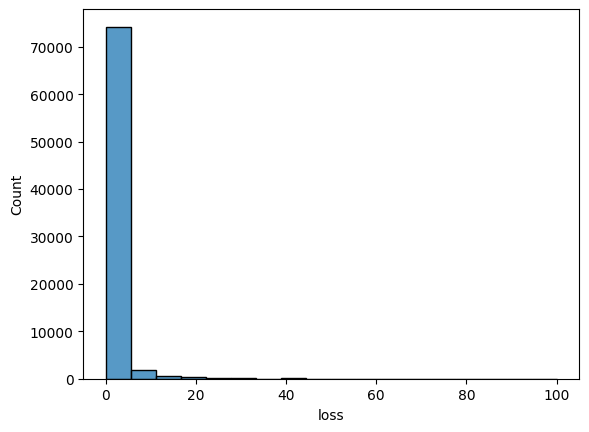

In [ ]:
sns.histplot(data =  data["loss"])

In [ ]:
data["loss"].kurtosis()

190.686899422352

In [ ]:
data.isna().sum().sum()

587321

In [ ]:
"""g = pd.DataFrame(data.isnull().sum() , columns = ["sum"])
g[g["sum"] > 0]"""

'g = pd.DataFrame(data.isnull().sum() , columns = ["sum"])\ng[g["sum"] > 0]'

In [ ]:

df = data.copy()
df.replace("NA",np.NaN)
df.fillna(df.mean(), inplace = True)
df = df.dropna()
df["loss"] = df["loss"].apply(lambda x: 0 if x== 0 else 1)


<ipython-input-27-41604f42fd75>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


In [ ]:
import random
randomlist = random.sample(range(1, 779), 9)

In [ ]:
"""for i in range(9):
  print("The kurtosis of {} is {}" .format("f"+str(randomlist[i]),data["f"+str(randomlist[i])].kurtosis()))"""

'for i in range(9):\n  print("The kurtosis of {} is {}" .format("f"+str(randomlist[i]),data["f"+str(randomlist[i])].kurtosis()))'

In [ ]:
"""fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
  for j in range(3):
    sns.histplot(ax = axs[i,j],data = data["f"+str(randomlist[cnt])])
    cnt+=1
plt.tight_layout()"""

'fig, axs = plt.subplots(3, 3)\ncnt = 0\nfor i in range(3):\n  for j in range(3):\n    sns.histplot(ax = axs[i,j],data = data["f"+str(randomlist[cnt])])\n    cnt+=1\nplt.tight_layout()'

In [ ]:
from sklearn.utils import resample
#Undersampling to bypass the imbalance in the loss column
n_defaults = df[df["loss"] == 0]
defaults = df[df["loss"] == 1]
sample_d = resample(defaults, replace = False,n_samples = 9642, random_state = 42)

sample_nd = resample(n_defaults,replace = False, n_samples = 20000, random_state = 42)

sample_data = pd.concat([sample_d,sample_nd])

In [ ]:
y = sample_data["loss"]
X = sample_data.drop(columns = ["id","loss"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(cumsum)
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Explained")

In [ ]:
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
print(d)

In [ ]:
pca = PCA(n_components=135)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter = 2000)
rc = RandomForestClassifier()
gb = GaussianNB()
xgb = XGBCLassifier()

#XGBoost

In [ ]:
xgb.fit(principalComponents_train,y_train)
round(xgb.score(principalComponents_train,y_train)

#LOGISTIC REGRESSION

In [ ]:
#Logistic Regression
logreg.fit(principalComponents_train,y_train)
round(logreg.score(principalComponents_train, y_train))


In [ ]:
logreg.score(principalComponents_test,y_test)

In [ ]:
logreg_pred = logreg.predict(principalComponents_train)
accuracy_score(y_train,logreg_pred)

#RANDOM FOREST CLASSIFIER

In [ ]:
rc.fit(principalComponents_train,y_train)
round(rc.score(principalComponents_train,y_train))


In [ ]:
rc.score(principalComponents_test,y_test)

In [ ]:
rc_pred = rc.predict(principalComponents_train)
accuracy_score(rc_pred,y_train)

#GAUSSIAN NAIVES BAYES

In [ ]:
gb.fit(principalComponents_train,y_train)
round(gb.score(principalComponents_train,y_train))

In [ ]:
gb.score(principalComponents_test,y_test)

In [ ]:
gb_pred = gb.predict(principalComponents_train)
accuracy_score(gb_pred,y_train)

#Model performance summary

In [ ]:
models = {"Logistic Regression": LogisticRegression(max_iter = 200),
        "Random Forest": RandomForestClassifier(),
        "Gaussian NB":GaussianNB()}

In [ ]:
df_model = pd.DataFrame(index=models.keys(),
                        columns=['Accuracy', 'Precision', 'Recall', 'F1score'])

In [ ]:
def train_model(model):
    m = model[1]
    m.fit(principalComponents_train,y_train)
    y_pred = m.predict(principalComponents_train)
    # cm = confusion_matrix(y_train, y_train_pred)
    # print('Confusion matrix: ' + model[0])
    # print(cm)
    # print()
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average = "macro")
    recall = recall_score(y_train, y_pred,average = "macro")
    f1 = f1_score(y_train, y_pred,average = "macro")
    print(f'{model[0]} Accuracy: {accuracy}')
    print(f'{model[0]} Precision: {precision}')
    # print(f'{model[0]} Recall: {recall}')
    # print(f'{model[0]} f1 - score: {f1}')

In [ ]:
Training_score_pca = [round(model.score(principalComponents_train, y_train) * 100, 2) for model in df_models.values()]
Testing_score_pca = [round(model.score(principalComponents_test, y_test) * 100, 2) for model in df_models.values()]

In [ ]:
for name,model in models.items():
    y_pred = model.predict(principalComponents_test)
    print("             {} report".format(name))
    print(metrics.classification_report(y_test, y_pred, digits=3))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
models_lst = list(models.values())
cnt = 0
for i in range(0,2):
  for j in range(0,2):
    model_pred = models_lst[cnt].predict(principalComponents_test)
    conf_m = confusion_matrix(y_test, model_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=['Non defaulters', 'Defaulters'],)
    display.plot(values_format='',ax = axes[i,j],colorbar = True,cmap = "plasma")
    display.ax_.set_title("{} confusion matrix".format(list(models.keys())[cnt]))
    cnt+=1
  plt.tight_layout()

In [ ]:
test_data = pd.read_csv("test_v2.csv",chunksize = 50000)

In [ ]:
from pprint import pprint

for data in test_data:
    x  = pd.DataFrame(data)
    break

In [ ]:
x.replace("NA",np.NaN)
x.fillna(x.mean(), inplace = True)
x = x.dropna()
standard_scaler = StandardScaler()
pca = PCA(n_components=d)
test_data_test =  standard_scaler.fit_transform(x)
principalComponents_test_data_test = pca.fit_transform(test_data_test)

In [ ]:
logreg.fit(principalComponents_train,y_train)
logreg_pred = logreg.predict(principalComponents_test_data_test)


In [ ]:
pd.DataFrame(logreg_pred).value_counts()

In [ ]:
g = pd.DataFrame({"Non-defaulters":[43866],"Defaulters":[3989]})
sns.barplot(data = g,errorbar=None)